# Análises sem outliers

Pedro Neto

In [1]:
require("ggplot2")
library(dplyr)
library(data.table)

setwd('/home/pasoneto/Documents/github/eye_tracking_ufabc/Luisiana')

data = fread("treated.csv")
#data = dplyr::filter(data, data$outliers == 0)
unique(filter(data, data$dominio == "comportamento adaptativo")$subteste)

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




[1] "autodirecao"          "lazer"                "saude e seguranca"   
 [4] "vida domestica"       "autocuidado"          "vida em comunidade"  
 [7] "funcao pre-academica" "motora"               "social"              
[10] "comunicacao"

# Verificando Idade

Idade no pré e no pós

In [2]:
plyr::ddply(data, c('condicao'), summarise,
                   idade = mean(idade_ano, na.rm = TRUE),
                   sd   = sd(idade_ano, na.rm = TRUE))

condicao,idade,sd
<chr>,<dbl>,<dbl>
pos,1.491034,0.1931073
pre,1.285181,0.1866507


# Verificando N

In [3]:
length(unique(data$crianca)) #mesmo número de criançar cortadas.
#Ninguem foi cortado mais de uma vez

[1] 22

# Verificando presença

Porcentagem de presença geral

In [4]:
mean(data$presenca_pct)
min(data$presenca_pct)
max(data$presenca_pct)

[1] 0.7990909

[1] 0.5

[1] 1

# Para colocar no Sample

Deixar claras as suas variáveis dependentes e independentes. Isso entra no design do estudo. Meu texto asusme que esses fatores tenham sido explicados previamente.

Inserir na seção de sample: 
A nossa amostra foi composta por 22 participantes voluntários, com idade média de $1.28 \pm 0.18$ no pré-teste e de $1.49 \pm 0.19$ no pós teste. 

# Análises descritivas

Como primeiro passo da análise de dados, nós computamos uma série de estatísticas descritivas sobre os escores obtidos antes e depois da intervenção musical (i.e., pré e pós). Esses escores foram computados em dois níveis distintos de especificidade: 1) por domínio e 2) por subdomínio. Uma esquematização de cada um desses níveis está disponível na figura X.  Essas estatísticas foram computadas como forma de visualizar possíveis efeitos da intervenção musical nos escores obtidos pelos participantes.  

%%results
Os resultados das estatísticas descritivas indicam, a nível de domínio da escala Bailey, que houve um aumento nos escores do pós teste foram para as capacidades cognitiva e motora (Figura X+1). Conforme representado na Figura X+2, no entanto, a melhora na capacidade motora se deve ao aumento da performance no subdomínio de motricidade grossa.

Conforme representado na figura X+3a e x+3b, não houve uma diferença aparente entre os escores pré e pós intervenção a nível de questionário (i.e., socioeconômico e de comportamento adaptativo), nem a nível dos subdomínios do questionário de comportamento adaptativo (Figura x+4).
%%results

Além de avaliar possíveis efeitos de intervenção nos escores obtidos pelos participantes, nós investigamos possíveis influências de variáveis entre-sujeitos que não foram explicitamente controladas no nosso design experimental. Especificamente, foram avaliadas possíveis interferências de idade e de presença sobre o efeito de intervenção musical. 

Para este fim, nós computamos 1) a média entre as idades no pré e no pós teste de cada participante; 2) o percentual de presença de cada criança; e 3) a diferença entre os escore no pós e no pré teste para cada participante (i.e., $\Delta e$). Com essas variáveis, nós pudemos avaliar a correlação entre $\Delta e$ e idade dos participantes, bem como entre $\Delta e$ e percentuais de presença.

%%result
A níve de domínio da escala Bailey, nós identificamos uma tendencia de correlação positiva [r(20) = 0.23, p = 0.29] entre a frequencia do participante e a diferença obtida entre os escores pré e pós teste (Figura X+5). Nós também identificamos uma correlação positiva entre $\Delta e$ e a idade dos participantes [r(20) = 0.43, p < 0.05] (figura x+6).

%%result

Por fim, nós realizamos uma análise de outliers, na qual foram computadas amplitudes interquartílicas (i.e. Inter Quantile Range - IQR) a nível de questionário (i.e., Socioemocional e de Comportamento adaptativo), e a nível de domínio (i.e., Bailey - Linguagem, Motor e Cognitivo). Foram considerados outliers aqueles que obtiveram notas $1.5$IQR acima ou abaixo do primeiro ou do terceiro quartil, respectivamente.
Nós identificamos ______. 

Como a exclusão dos outliers não ocasionou nenhuma mudança aparente nos resultados das nossas estatísticas descritivas, nós optamos por não excluílos das análises iniciais. Todos os resultados reportados na seção seguinte foram computados, portanto, com inclusão dos outliers identificados.

In [5]:
#Outliers nivel de domínio

#table(data$outlier, data$dominio)
table(data$outlier, data$dominio)

   
    cognitivo comportamento adaptativo linguagem motora socioemocional
  0        39                      440        88     86             39
  1         3                        0         0      2              1
  2         2                        0         0      0              4

# Verificando efeitos

Efeito de tratamento na Bailey

In [6]:
data = fread("treated.csv")
data = dplyr::filter(data, data$outliers == 0)

dt = data.frame(score    = data$nota_esc.x,
                testes   = data$dominio,  
                crianca  = data$crianca,
                condicao = data$condicao,
                geral    = data$teste)

base <- plyr::ddply(dt, c('testes', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

Efeito de tratamento no questionário 1

Saving 6.67 x 6.67 in image



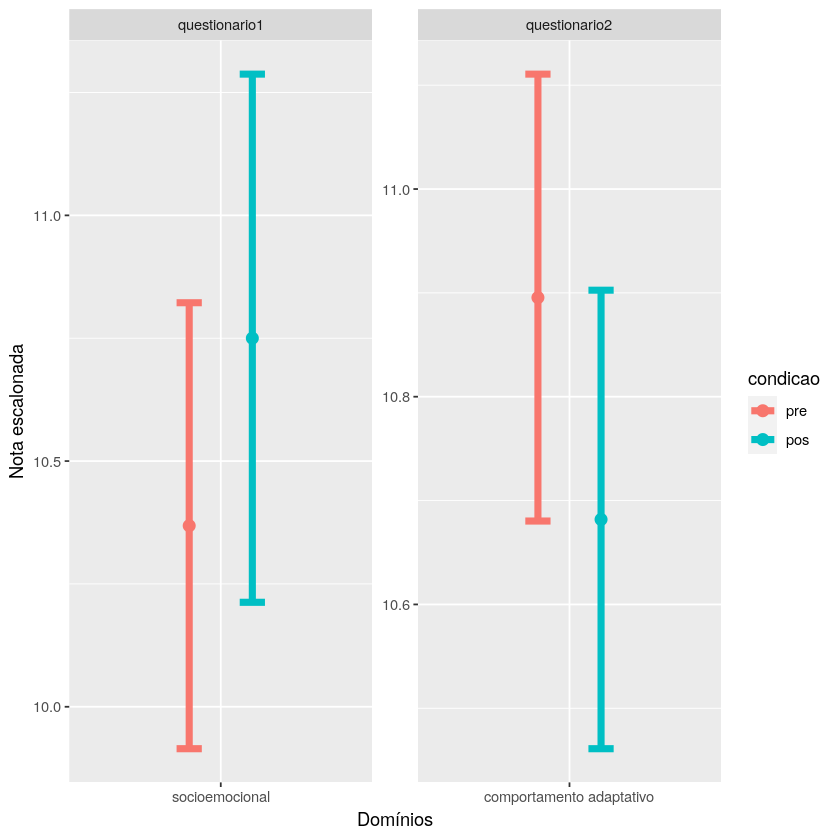

In [7]:
#x+3a e x+3b
x3 = ggplot(dplyr::filter(base, base$geral != 'bailey'), aes(x = testes, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  facet_wrap(~geral, scale = "free")+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Domínios")+
  ylab("Nota escalonada")
x3
ggsave(x3, file="x3.png", dpi = 300)

# Subdomínios

Verificando subdomínio para cada teste global (Bailey, Questionário 1 e Questionário 2)

## Bailey

Bailey por domínio

In [8]:
#x+1
rm(list=ls()) #cleans directory

dt = fread("treated.csv")
#dt = dplyr::filter(dt, dt$outliers == 0)

dt = data.frame(score = dt$nota_esc.x,
                teste = dt$dominio,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste
               )

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score))
                    )

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

x1 = ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  ylab("Escore")+ xlab("Domínio")+
  theme(text = element_text(size = 20))
ggsave(x1, file="x1.png", dpi = 300)

Saving 6.67 x 6.67 in image



## Bailey
Bailey por subdomínio

Saving 6.67 x 6.67 in image



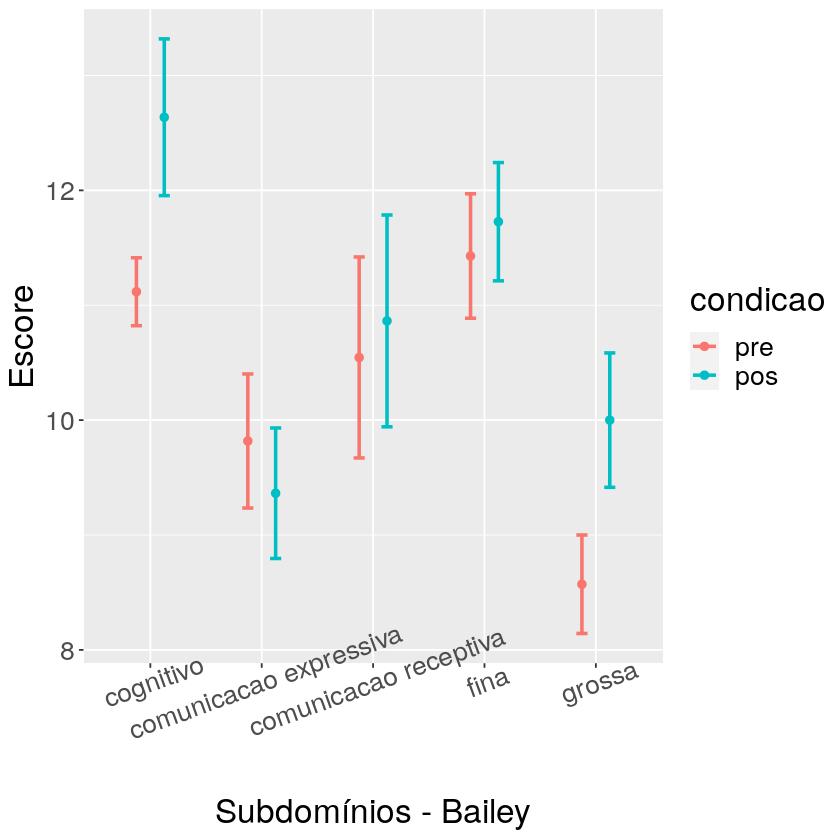

In [9]:
#x+2
rm(list=ls()) #cleans directory

dt = fread("treated.csv")
dt = dplyr::filter(dt, dt$outliers == 0)


dt = data.frame(score = dt$nota_esc.x,
                teste = dt$subteste,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste
               )

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score))
                    )

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

x2 = ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 20))+
  xlab("Subdomínios - Bailey") + ylab("Escore")+
  theme(text = element_text(size = 20))
x2
ggsave(x2, file="x2.png", dpi = 300)

## Questionário 2

Saving 6.67 x 6.67 in image



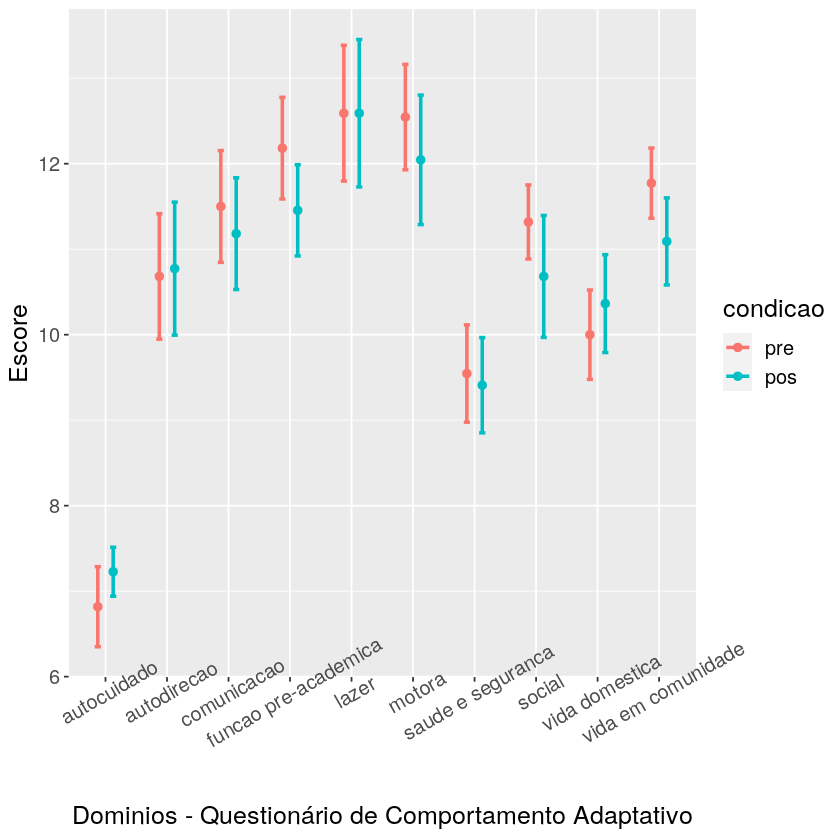

In [10]:
#x+4
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = filter(dt, dt$outlier == 0)

dt = data.frame(score = dt$nota_esc.x,
                teste = dt$subteste,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste)

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))


base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

x4 = ggplot(dplyr::filter(base, base$geral == 'questionario2'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 30))+ 
  xlab("Dominios - Questionário de Comportamento Adaptativo") + ylab("Escore")+
  theme(text = element_text(size = 15))
x4
ggsave(x4, file="x4.png", dpi = 300)

# Efeito de presença

Overall

In [11]:
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = filter(dt, dt$outlier == 0)

base <- plyr::ddply(dt, c("crianca", "condicao"), summarise,
                    presenca = mean(presenca_pct, na.rm = TRUE),
                    score    = mean(nota_esc.x, na.rm = TRUE))

base = tidyr::spread(base, condicao, score)
base$dif = base$pos-base$pre

# ggplot(base, aes(x = presenca, y = dif))+
#     geom_point()+
#     geom_smooth(method = 'lm')


	Pearson's product-moment correlation

data:  um and dois
t = 1.0796, df = 20, p-value = 0.2932
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2074796  0.5971829
sample estimates:
      cor 
0.2346553 


`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



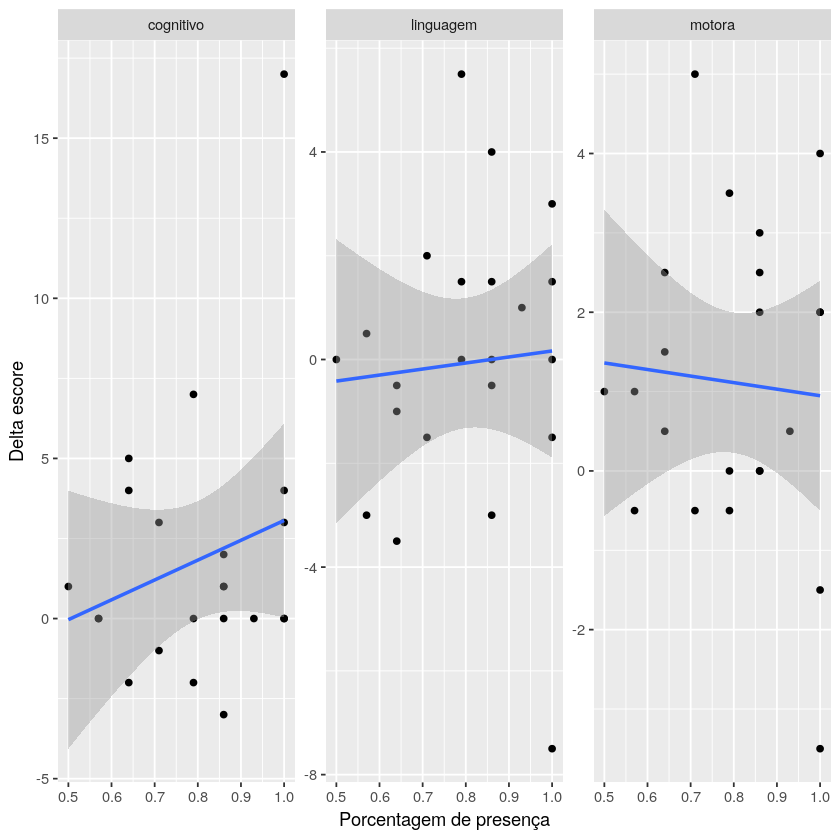

In [12]:
#Figura x+5
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = filter(dt, dt$teste == "bailey")

base <- plyr::ddply(dt, c("crianca", "condicao", "dominio"), summarise,
                    presenca = mean(presenca_pct, na.rm = TRUE),
                    score    = mean(nota_esc.x, na.rm = TRUE))

base = tidyr::spread(base, condicao, score, convert = FALSE)
base$dif = base$pos-base$pre

x5 = ggplot(base, aes(x = presenca, y = dif))+
    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm')+ 
    xlab("Porcentagem de presença") + ylab("Delta escore")

um = dplyr::filter(base, base$dominio == "cognitivo")$presenca
dois = dplyr::filter(base, base$dominio == "cognitivo")$dif
cor.test(um, dois)
x5
ggsave(x5, file="x5.png", dpi = 300)

In [13]:
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
#dt = dplyr::filter(dt, dt$outlier == 0)

base = data.frame(crianca = dt$crianca,
                  condicao = dt$condicao,
                  score_pre = dt$nota_esc.x,
                  dominio = dt$dominio,
                  idade_pre = dt$idade_ano)

pre = dplyr::filter(base, base$condicao == "pre")
pos = dplyr::filter(base, base$condicao == "pos")

pre$idade_pos = pos$idade
pre$score_pos = pos$score

pre$idade_media = (pre$idade_pos + pre$idade_pre)/2
pre$score_dif = pre$score_pos - pre$score_pre

base = pre

# dt %>%
#    group_by(crianca, condicao, dominio) %>%
#    summarise(idade = mean(idade_ano), score = mean(nota_esc.x))

# ggplot(dplyr::filter(base, base$dominio == "linguagem"), aes(x = idade_media, y = score_dif))+
# #    facet_wrap(~dominio, scale = 'free')+
#     geom_point()+
#     geom_smooth(method = 'lm')

um = dplyr::filter(base, base$dominio == "linguagem")$idade_media
dois = dplyr::filter(base, base$dominio == "linguagem")$score_dif
cor.test(um, dois)


	Pearson's product-moment correlation

data:  um and dois
t = 1.913, df = 42, p-value = 0.06258
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01503278  0.53502274
sample estimates:
      cor 
0.2831111 


# Linguagem subgrupo

Efeito de idade nos subgrupos de linguagem da bailey

[1] "V1"           "crianca"      "dominio"      "condicao"     "subteste"    
 [6] "nota Bruta"   "nota_esc.x"   "data_teste"   "nascimento"   "idade"       
[11] "presenca"     "oficinas"     "presenca_pct" "teste"        "av1_pre"     
[16] "av2_pre"      "av1_pos"      "idade_ano"    "nota_esc.y"   "outliers"

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



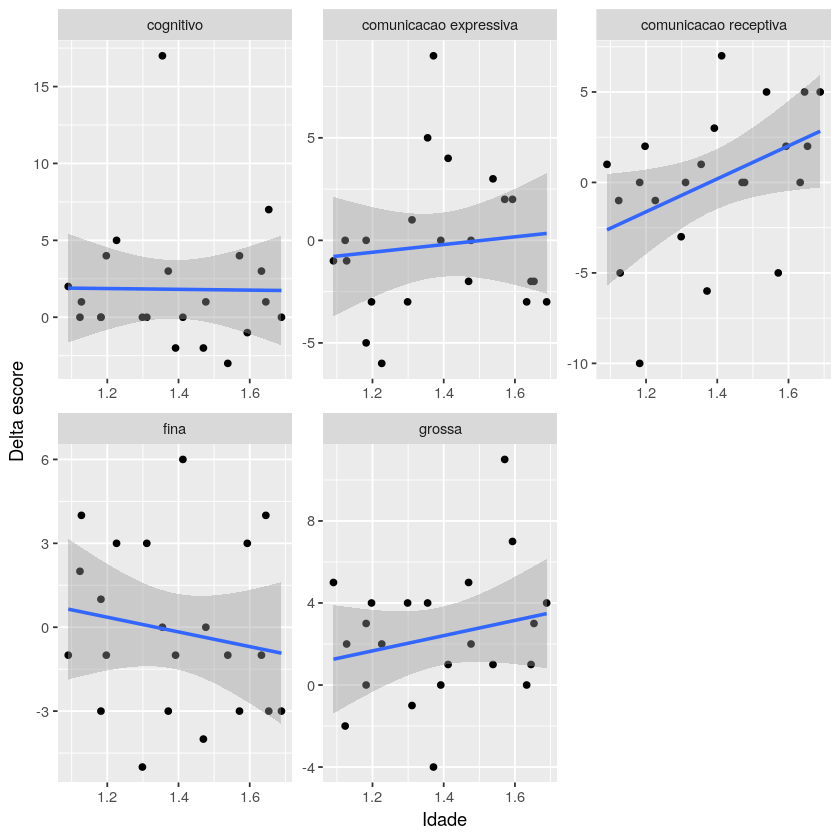

`geom_smooth()` using formula 'y ~ x'



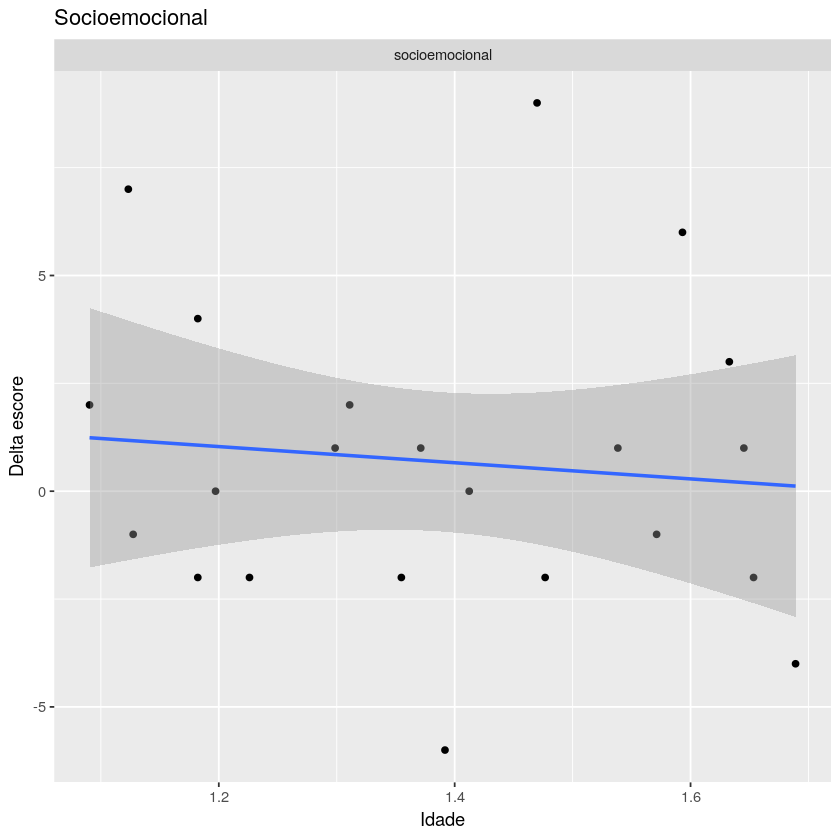

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



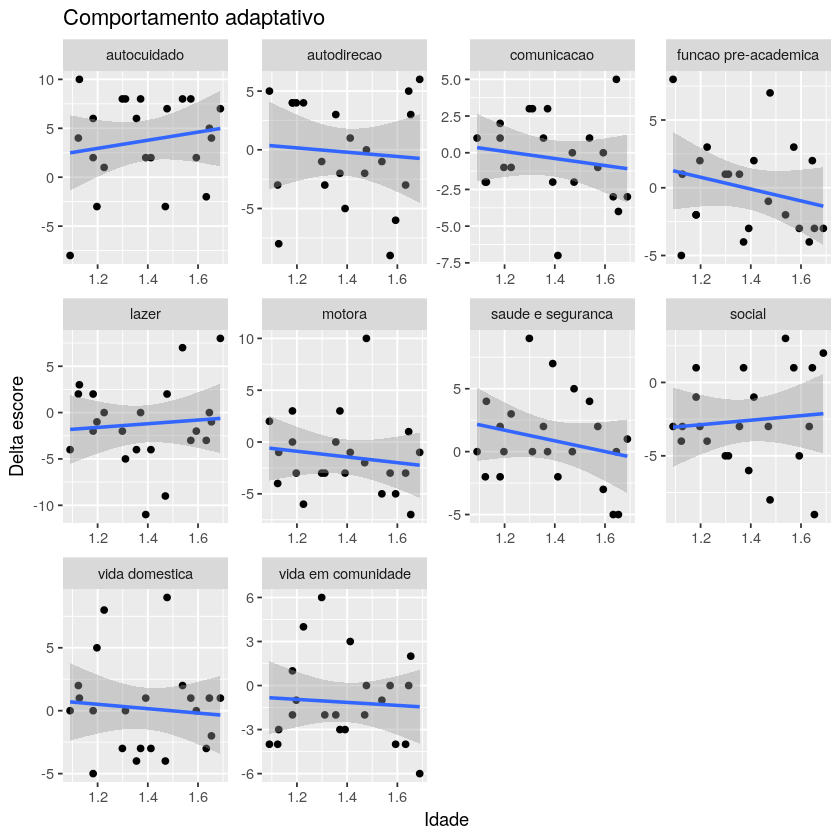

In [31]:
#x+6
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
#dt = dplyr::filter(dt, dt$outlier == 0)

colnames(dt)

base = data.frame(crianca = dt$crianca,
                  condicao = dt$condicao,
                  score_pre = dt$nota_esc.x,
                  dominio = dt$subteste,
                  teste = dt$teste,
                  idade_pre = dt$idade_ano)

pre = dplyr::filter(base, base$condicao == "pre")
pos = dplyr::filter(base, base$condicao == "pos")

pre$idade_pos = pos$idade
pre$score_pos = pos$score

pre$idade_media = (pre$idade_pos + pre$idade_pre)/2
pre$score_dif = pre$score_pos - pre$score_pre

base = pre

# dt %>%
#    group_by(crianca, condicao, dominio) %>%
#    summarise(idade = mean(idade_ano), score = mean(nota_esc.x))

x6a = ggplot(filter(base, base$teste == "bailey"), aes(x = idade_media, y = score_dif))+
    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm') + 
    xlab("Idade") + ylab("Delta escore")
x6b = ggplot(filter(base, base$teste == "questionario1"), aes(x = idade_media, y = score_dif))+
    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm') + 
    ggtitle("Socioemocional") +
    xlab("Idade") + ylab("Delta escore")
x6c = ggplot(filter(base, base$teste == "questionario2"), aes(x = idade_media, y = score_dif))+
    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm') + 
    ggtitle("Comportamento adaptativo") +
    xlab("Idade") + ylab("Delta escore")

x6a
x6b
x6c

# um = dplyr::filter(base, base$dominio == "comunicacao receptiva")$idade_media
# dois = dplyr::filter(base, base$dominio == "comunicacao receptiva")$score_dif
# cor.test(um, dois)
ggsave(x6a, file="x6a.png", dpi = 300)
ggsave(x6b, file="x6b.png", dpi = 300)
ggsave(x6c, file="x6c.png", dpi = 300)
#Comunicação receptiva - detalhar

# Segunda leva de análises

### Só para linguagem

- Análise por grupo CHECK
- Comparar pré-pós de crianças com pontuação acima/abaixo de 10 CHECK - Refazer
- Pontuação bruta subdominio linguagem CHECK
- Idade/faixa etária como covariate FUTURO
- Faixa etária como grupo CHECK

In [15]:
#Adicionando grupos de idade
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = dplyr::filter(dt, dt$dominio == "linguagem")
age_e <- function(x){
            group <- c('a', 'b', 'c', 'd')
            receptiva <- c(0, 12.15, 12.16, 14.15, 14.16, 17.15, 17.16, 23)/12
            b <- seq(1, 7, 2)
            for(i in 1:4){ 
                if( between(x, receptiva[b[i]], receptiva[b[i+1]]) ){
                    y = group[i] 
                }
            }
            return(y)
        }

age_r <- function(x){
            group <- c('a', 'b', 'c', 'd', 'e')
            expressiva <- c(0, 12, 12.16, 14.15, 14.16, 16.15, 16.16, 19.15, 19.16, 23)/12
            b <- seq(1, 9, 2)
            for(i in 1:5){ 
                if( between(x, expressiva[b[i]], expressiva[b[i+1]]) ){
                    y = group[i] 
                }
            }
            return(y)
        }

In [16]:
# Computando idade média
idades = plyr::ddply(dt, c("crianca"), summarise,idade_media = mean(idade_ano, na.rm = TRUE))
dt = merge(x = dt, y = idades, by.x = "crianca", by.y = "crianca")

In [17]:
expressiva = dplyr::filter(dt, dt$subteste == "comunicacao expressiva")
receptiva  = dplyr::filter(dt, dt$subteste == "comunicacao receptiva")
expressiva$idade_grupo = as.character(lapply(expressiva$idade_media, age_e))
receptiva$idade_grupo  = as.character(lapply(receptiva$idade_media, age_r))

dt = dplyr::bind_rows(expressiva, receptiva)
# unique(dt$subteste)

In [18]:
g = fread('groups.csv', header = F, encoding = 'UTF-8')
g$V1 = unique(dt$crianca)

g = data.frame(crianca = g$V1, grupo = g$V2)

dt = merge(x = dt, y = g, by.x = "crianca", by.y = "crianca", all = T)
# unique(dt$subteste)
# table(dt$crianca, dt$grupo)

## Análise por grupo

Grupo de aplicação da Bailey

Saving 6.67 x 6.67 in image



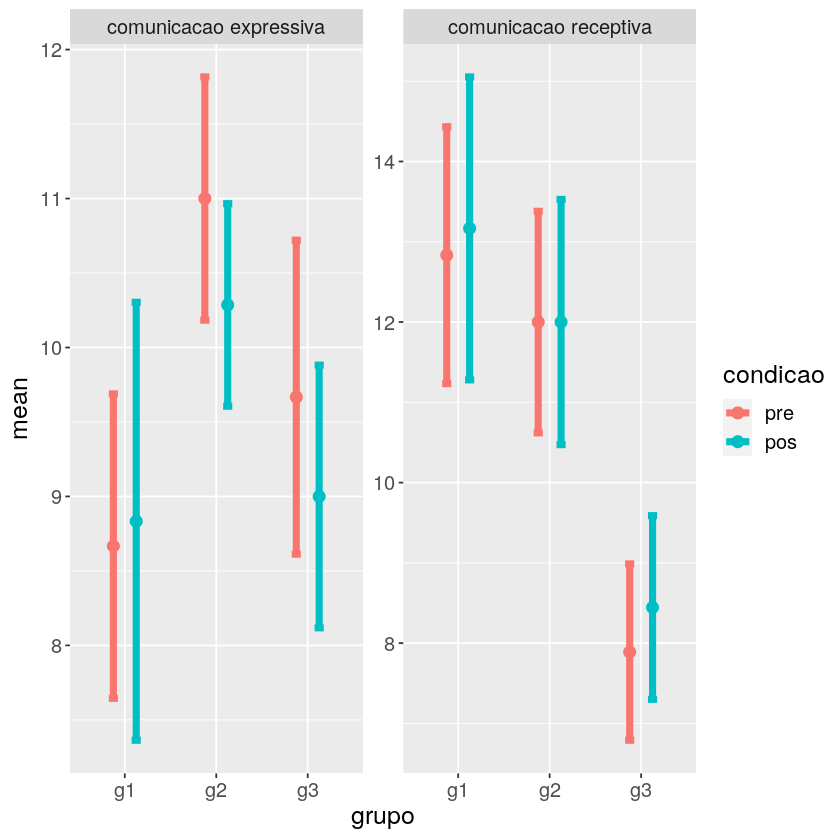

In [19]:
# x+7
data = data.frame(score     = dt$nota_esc.x,
                score_raw   = dt$`nota Bruta`,
                dominio     = dt$subteste,
                crianca     = dt$crianca,
                condicao    = dt$condicao,
                idade_grupo = dt$idade_grupo,
                grupo       = dt$grupo)

base <- plyr::ddply(data, c('dominio', "condicao", "grupo"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

x7 = ggplot(base, aes(x = grupo, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  facet_wrap(~dominio, scale = "free")+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(text = element_text(size = 15))
x7
ggsave(x7, file="x7.png", dpi = 300)
# Como forma de avaliar uma possível influência de 
# sessão experimental na performance dos participants, 
# nós tambem computamos essas estatísticas descritivas separando por grupos. 
# As sessões experimentais (i.e. G1, G2 e g3) contaram com 6, 7 e 9 participantes, 
#respectivamente


Saving 6.67 x 6.67 in image



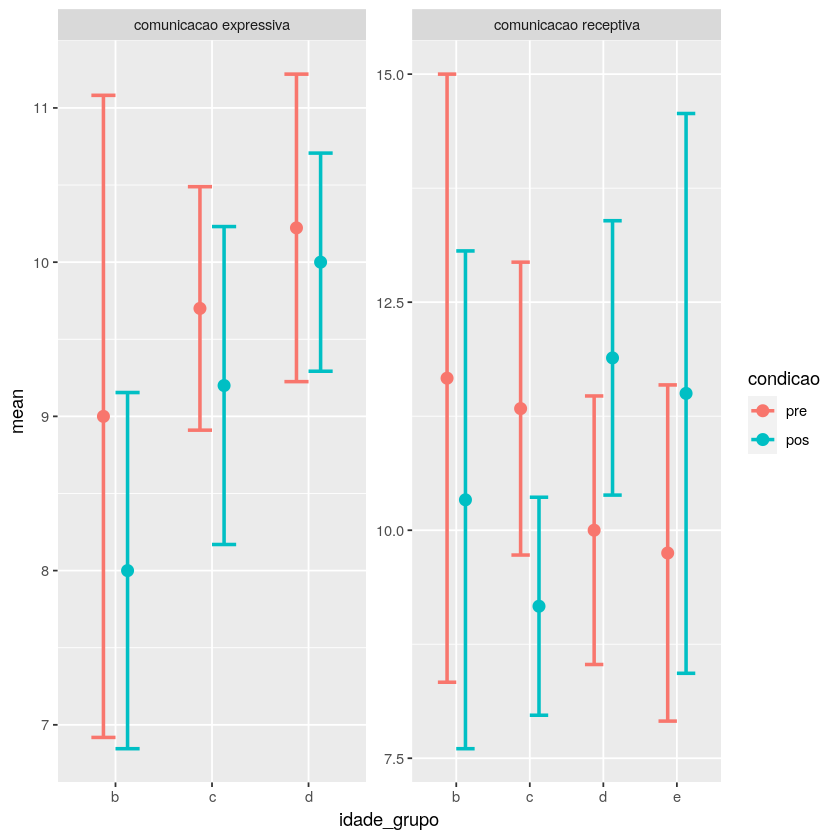

In [20]:
#x+8
#Computing descriptives
base <- plyr::ddply(data, c('dominio', "condicao", "idade_grupo"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

x8 = ggplot(base, aes(x = idade_grupo, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  facet_wrap(~dominio, scale = "free")+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.5, position = position_dodge(width = 0.5))
x8
ggsave(x8, file="x8.png", dpi = 300)


## Raw score

Warning message:
“Duplicated aesthetics after name standardisation: width”
Saving 6.67 x 6.67 in image



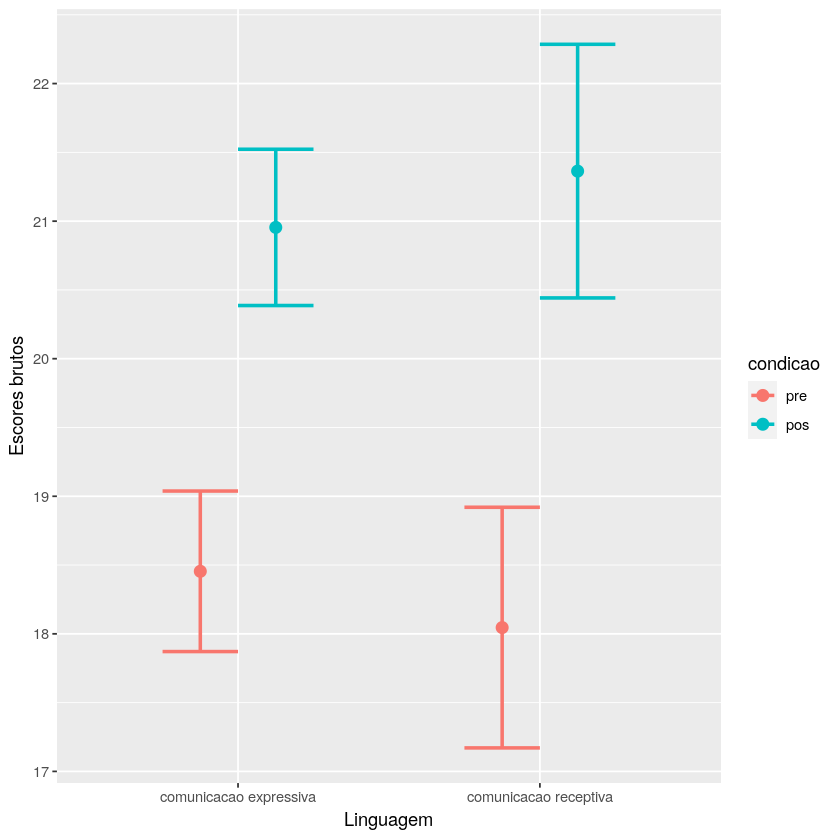

In [21]:
base <- plyr::ddply(data, c('dominio', "condicao"), summarise,
                    mean = mean(score_raw, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

x9 = ggplot(base, aes(x = dominio, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, width = 0.5, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Linguagem")+ylab("Escores brutos")
x9
ggsave(x9, file="x9.png", dpi = 300)

# Análise acima de 10 e abaixo de 10

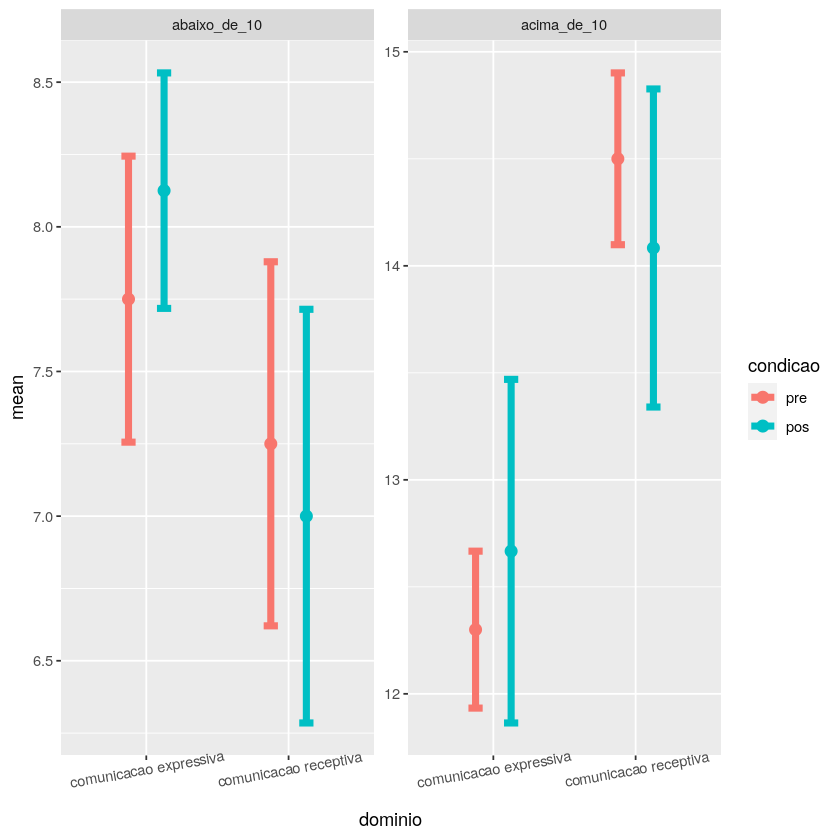

In [22]:
#Computing descriptives
data = data.frame(score     = dt$nota_esc.x,
                score_raw   = dt$`nota Bruta`,
                dominio     = dt$subteste,
                crianca     = dt$crianca,
                condicao    = dt$condicao,
                idade_grupo = dt$idade_grupo,
                grupo       = dt$grupo)

data$outliers_2 <- 0
for(i in 1:nrow(data)){
    if(data$score[i] > 10){
        data$outliers_2[i] = "acima_de_10"        
    } else {
        data$outliers_2[i] = "abaixo_de_10"
    }
}

#fazer por pré_teste
base <- plyr::ddply(data, c('dominio', "condicao", "outliers_2"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

base$condicao <- factor(base$condicao, levels=c("pre", "pos"))

ggplot(base, aes(x = dominio, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  facet_wrap(~outliers_2, scale = "free")+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 10))

#porcentagens acima e abaixo de 10

# ANCOVA